In [2]:
# Package imports
from SGD.dynamics import Trainer
from SGD.data import DataGenerator , SpikeGenerator
from SGD.plot_config import *
from SGD.utils import initialize_weights , make_params_dict , save_fig , save_data , load_data , make_data_paths

# Libraries
import numpy as np
import matplotlib.pyplot as plt
import time

# Plot styles
apply_general_styles()

# Simple Example

In [8]:
# Minimal Parameters
d = 40
spike = True
snr = 0.9
teacher = 'He4'
student = 'He4'
loss = 'corr'
lr = 0.001
N_steps = int(20*d**3)

# Initialize weights
u_spike, w_initial = initialize_weights(d,m0=0.0,mode='fixed')

# Initialize data generator
data_generator = SpikeGenerator(d,u_spike,snr) if spike else DataGenerator(d, teacher, u_spike)

# Initialize Trainer
trainer = Trainer(d, u_spike, student, loss, lr, data_generator)

# Save data
tprints = np.unique(np.logspace(-0.1,np.log10(N_steps),100).astype(int))
data = {'overlap':[],'times':tprints}

# Run evolution
t0 = time.time()
print("Starting training...")
for step, (w_student, flag , grad) in enumerate(trainer.evolution(w_initial, N_steps, progress=True)):
    if step in tprints: # Save some steps
        data['overlap'].append(w_student @ u_spike)

dt = time.time() - t0
print(f"End training... Took = {dt/60:.4} min")

# Optional Step
for key in data:
    data[key] = np.array(data[key])

# Save data
name_vars = ['d','snr']
params = make_params_dict(name_vars)
save_data(data,file_name='test',params=params,base_dir='../data')

# Load data
data_loaded = load_data(file_name='test',params=params)

Starting training...


100%|██████████| 1280000/1280000 [00:44<00:00, 28814.58it/s]

End training... Took = 0.7404 min
File saved with pickle.dump on ../data\ as test_d40_snr0.9.pkl
File test_d40_snr0.9.pkl loaded with pickle.load from ../data\


Figure saved on ../plots\ as test_d40_snr0.9.png


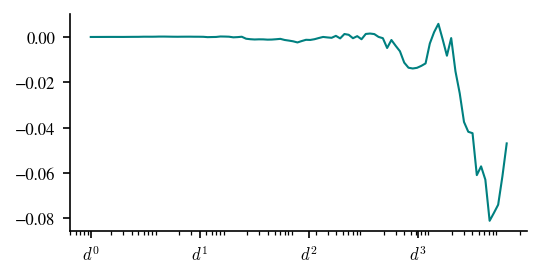

In [10]:
# Other variables
col = pc_colors[0]
xtk = [d**i for i in range(4)]
xlb = [rf'$d^{i}$' for i in range(4)]

# Create figure and plot and font setup
set_font_sizes('normal')
fig , axes = create_fig()
ax = axes
ax.plot(data_loaded['times'][1:],data_loaded['overlap'],color=col,lw=1)
ax.set_xscale('log')
ax.set_xticks(xtk,xlb)

# Save figure
save_fig(fig, file_name='test', params=params)

# Plot spiked trajectories

In [4]:
# Load the data

# Parameters fixed
d = 100
alpha = 70.0
snr = 0.9
spike = True

# Parameter lists
modes = ['online','repeat']
losses = ['mse','corr']
students = ['relu','tanh']
lrs = [0.01 , 0.05 , 0.1 , 0.5]

# Parameters saved
names_fixed = ['d','snr','alpha']
names_variable = ['mode','loss','student','lr']

# Load the variables
data = {}
for mode in modes:
    data[mode] = {}
    for loss in losses:
        data[mode][loss] = {}
        for student in students:
            data[mode][loss][student] = {}
            for lr in lrs:
                params = make_params_dict(names_fixed,names_variable)
                x = load_data(file_name='overlap',experiment_name='test_spike',params=params,show=False)
                data[mode][loss][student][lr] = x

print(x.keys())

dict_keys(['overlap', 'times', 'params'])


Figure saved on ../plots\2025-10 as spiked_evolution_alpha70_d100_lossmse_modeonline_snr0.9.png


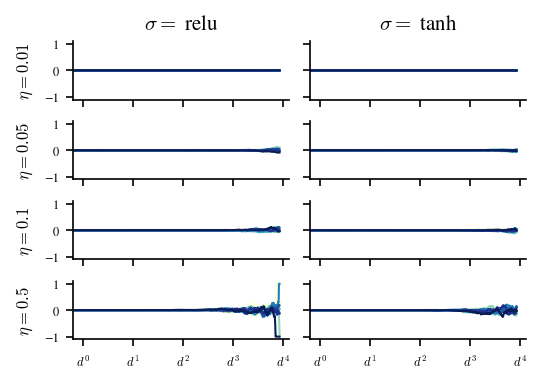

In [ ]:
# Other variables
N_walkers = x['params']['N_walkers']
mode = 'online'
loss = 'mse'

cols = plt.get_cmap(pc_cmaps[0])(np.linspace(0,1,N_walkers))
xtk = [d**i for i in range(5)]
xlb = [rf'$d^{i}$' for i in range(5)]

# Create figure and plot and font setup
set_font_sizes('tight')
fig , axes = create_fig(nrows=len(lrs),ncols=len(students),h=0.7,sharey=True)

for i , lr in enumerate(lrs):
    for j , student in enumerate(students):
        ax = axes[i,j]
        # Setupd
        if i == 0 : ax.set_title(fr'$\sigma = $ {student}')
        if j == 0 : ax.set_ylabel(fr'$\eta = {lr}$',fontsize=FONTSIZES['s'])

        # Get data and plot
        T = data[mode][loss][student][lr]['times']
        m = data[mode][loss][student][lr]['overlap']
        for w in range(N_walkers):
            ax.plot(T,m[:,w],color=cols[w])

        # Change scale
        ax.set_xscale('log')
        ax.set_xticks(xtk,xlb)
        

# Save figure
names = ['mode','loss','d','snr','alpha']
params = make_params_dict(names)
save_fig(fig, file_name='spiked_evolution', params=params,date=True)

# New data with k=3

In [ ]:
# Parameters fixed
snr=5.0
alpha = 70.0
teacher = 'He3'
rho = 0.7
N_walkers = 10
loss = 'corr'

# Parameter lists
ds = [128 ,256 , 512, 1024][:3]
modes = ['online','repeat']
lrs = [0.05 , 0.1 , 0.5 , 1.0]
students = ['He3','He2+He3'][:1]
models = ['perceptron','skewed']

# Parameters to save
names_fixed = ['snr','alpha','teacher','loss','rho','N_walkers']
names_variable = ['d','mode','lr','student','model']

data = {}
for d in ds:
    data[d] = {}
    for mode in modes:
        data[d][mode] = {}
        for lr in lrs:
            data[d][mode][lr] = {}
            for student in students:
                data[d][mode][lr][student] = {}
                for model in models:    
                    params = make_params_dict(names_fixed,names_variable)
                    x = load_data(file_name='evolutions',experiment_name='time_traces',params=params,show=False)
                    data[d][mode][lr][student][model] = x

print(x.keys())



dict_keys(['overlap', 'times', 'params', 'final_w'])


Figure saved on ../plots\2025-10 as compare_online_repeat_alpha70_losscorr_lr0.5_moderepeat_modelperceptron_rho0.7_snr5_studentHe3.png


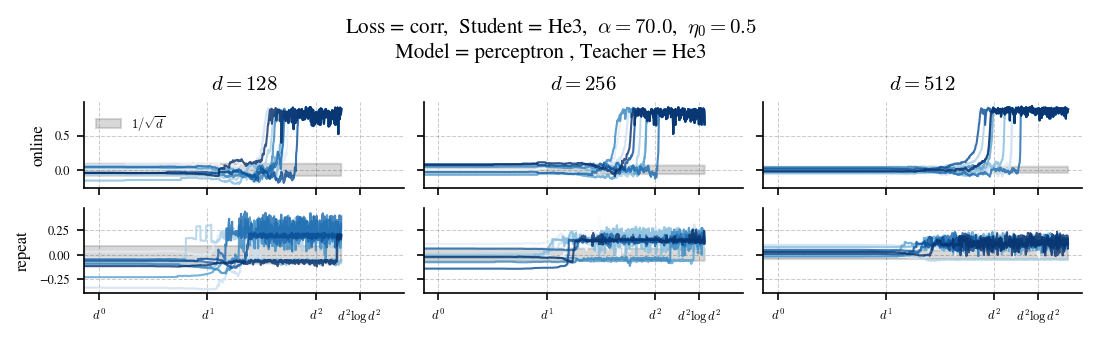

In [109]:
import matplotlib.ticker as mticker
# Other variables
N_walkers = x['params']['N_walkers']
lr = 0.5
student = 'He3'
model = 'perceptron'

cols = plt.get_cmap('Blues')(np.linspace(0.,1,N_walkers))

xlb = [rf'$d^{i}$' for i in range(3)]+[r'$d^2\log d^2$']

# Create figure and plot and font setup
set_font_sizes('tight')
fig , axes = create_fig(nrows=len(modes),ncols=len(ds),h=0.3,sharey='row',size='double')

for i , d in enumerate(ds):
    xtk = [d**i for i in range(3)] + [d**2 * np.log(d**2)]
    for j , mode in enumerate(modes):
        ax = axes[j,i]
        # Setupd
        if i == 0 : ax.set_ylabel(fr'{mode}',fontsize=FONTSIZES['s'])
        if j == 0 : ax.set_title(fr'$d = {d}$')

        # Change scale
        ax.set_xscale('log')
        ax.xaxis.set_major_locator(mticker.FixedLocator(xtk))   # force only these major ticks
        ax.set_xticklabels(xlb)
        ax.xaxis.set_minor_locator(mticker.NullLocator())       # hide all minor ticks

        # Get data and plot
        T = data[d][mode][lr][student][model]['times']
        m = data[d][mode][lr][student][model]['overlap']
        for w in range(N_walkers):
            ax.plot(T,m[:,w],color=cols[w],lw=1,alpha=0.8)
        
        ax.fill_between(T,-1/np.sqrt(d),1/np.sqrt(d),color='gray',alpha=0.3,label=r'$1/\sqrt{d}$')

        
        # Make sure only the major ticks are shown
        
        ax.grid(lw=0.5,alpha=0.2,ls='--',c='k')

 
axes[0,0].legend(frameon=False)

title = fr' Loss = {loss},  Student = {student},  $\alpha = {alpha}$,  $\eta_0 = {lr}$ '+'\n'+f' Model = {model} '

if model == 'perceptron':
    title += f', Teacher = {student}'
elif model == 'skewed':
    title += rf', $\beta = {snr}$, $\rho = {rho}$'
fig.suptitle(title)

# Save figure
names = ['model','mode','loss','student','rho','lr','snr','alpha']
params = make_params_dict(names)
# print(params)
save_fig(fig, file_name='compare_online_repeat', params=params,date=True)

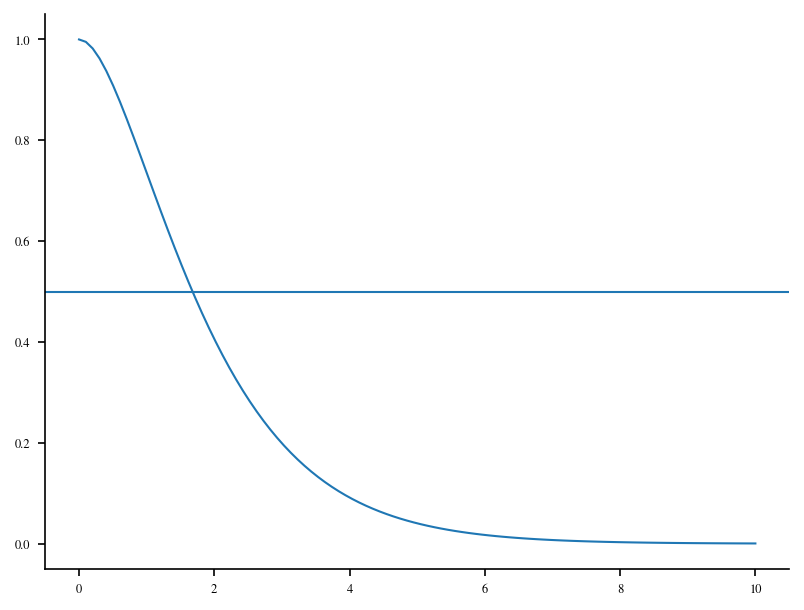

In [58]:
la = np.linspace(0,10,100)
y = (1+la)*np.exp(-la)
plt.plot(la,y)
plt.axhline(0.5)